In [130]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [131]:
data = pd.read_csv("MiceProtein_2f2c.csv", sep=",").values

In [150]:
#We know the last column has the class labels, so we can select using the last column (-1)
X = data[:,:-1]
y = data[:,-1]

In [133]:
#Manual way of converting the class labels:
manual_y = np.zeros(np.shape(y))
manual_y[y == "P"] = 1
manual_y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [134]:
#Using label encoder
le = LabelEncoder()
le.fit(["N", "P"])
encoder_y = le.transform(y)

In [135]:
#Both methods give the same results, although the label encoder is a general way of performing this conversion
manual_y == encoder_y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, encoder_y, test_size=0.25, stratify=encoder_y)

In [137]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [138]:
knn = KNeighborsClassifier()
parameters = {'p':[1,2,3,4,5],
              'n_neighbors':[3,5,7,11,13,15,17]}

gsc = GridSearchCV(knn, parameters)
gsc.fit(X_train_scaled, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 11, 13, 15, 17],
                         'p': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [139]:
gsc.cv_results_['mean_test_score']

array([0.82666667, 0.84888889, 0.84888889, 0.85333333, 0.85777778,
       0.86222222, 0.85333333, 0.85333333, 0.85777778, 0.85777778,
       0.86666667, 0.86222222, 0.86222222, 0.87111111, 0.87111111,
       0.87111111, 0.87111111, 0.87111111, 0.87555556, 0.88      ,
       0.88      , 0.86222222, 0.86222222, 0.87111111, 0.87555556,
       0.88      , 0.88      , 0.87555556, 0.87111111, 0.87111111,
       0.88888889, 0.88444444, 0.88      , 0.87555556, 0.87555556])

In [140]:
#Get the best score index using argmax
bestindex = np.argmax(gsc.cv_results_['mean_test_score'])

In [141]:
gsc.cv_results_['mean_test_score'][bestindex]
#There are multiple with 0.9, but that's okay, they should all perform relatively the same

0.888888888888889

In [142]:
#View the best parameters from the param list
best_params = gsc.cv_results_['params'][bestindex]

In [143]:
#Fit a new KNN classifier with the best parameters from grid search
knn_final = KNeighborsClassifier(n_neighbors=best_params["n_neighbors"], p=best_params["p"])

In [144]:
#Train the classifier
knn_final.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=1,
                     weights='uniform')

In [145]:
#Scale the test data using the scaler trained from the training data
X_test_scaled = scaler.transform(X_test)

In [146]:
#Get predictions from the newly trained classifier
predictions = knn_final.predict_proba(X_test)

In [147]:
#Loading ROC/PRC Functions
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, average_precision_score, auc
def plotROC(yscore, true, title=None, outfile=None):
    """Generates a receiver operating characteristic
        curve for the given prediction probabilities.
        
        Parameters
        ----------
        yscore : list of lists
        Probability scores.
        
        true : list of lists
        True labels.
        
        title : str
        The title of the confusion matrix.
        
        outfile : str
        The destination of the .pdf file generated.
        """
    fig = plt.figure()
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    if title:
        plt.title(title)
    
    fpr, tpr, _ = roc_curve(true, yscore[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='(ROC AUC = %0.2f)' % (roc_auc),linewidth=2)

    plt.legend(loc="lower right")
    
    if outfile:
        pdfplot = PdfPages(outfile);
        pdfplot.savefig(fig)
        pdfplot.close()
    

def plotPRC(yscore, true, title=None, outfile=None):
    """Generates a precision recall curve for the
        given prediction probabilities.
        
        Parameters
        ----------
        yscore : list of lists
        Probability scores.
        
        true : list of lists
        True labels.
        
        title : str
        The title of the confusion matrix.
        
        outfile : str
        The destination of the .pdf file generated.
        """
    
    fig = plt.figure()
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    if title:
        plt.title(title)
    
    precision, recall, _ =  precision_recall_curve(true, yscore[:,1])
    prc_auc = average_precision_score(true, yscore[:,1])
    plt.plot(recall, precision, label='(Avg. Precision = %0.2f)' % (prc_auc),linewidth=1)
    
    plt.legend(loc="lower right")
    if outfile:
        pdfplot = PdfPages(outfile);
        pdfplot.savefig(fig)
        pdfplot.close()

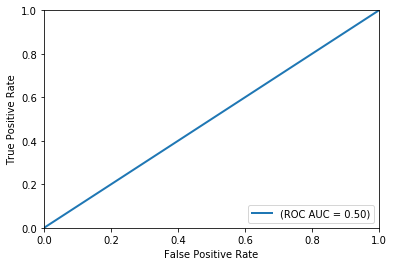

In [148]:
plotROC(predictions, y_test)

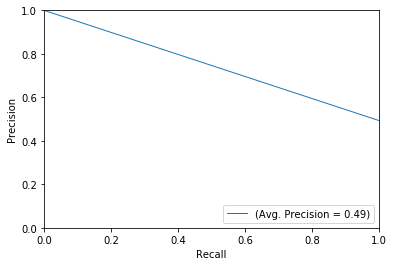

In [149]:
plotPRC(predictions, y_test)